### Multinomial (Multi-class) Classification with MNIST and Logistic Regression

Jay Urbain, PhD

References:

- Games, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) An Introduction to Statistical Learning
with applications in R, www.StatLearning.com, Springer-Verlag, New York. Chapter 4.

- [scikit-learn](http://scikit-learn.org/stable/)

In this notebook we will be applying multinomial logistic regression classification using *scikit-learn* to classify instances of digits using the  *MNIST* dataset.

You will be guided through fitting and evaluating a multinomial Logistic Regression classifier to the MNIST dataset.

Complete the **TODO** items in the cell(s) below.

#### Imports

In [1]:
# To support both python 2 and python 3
#from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


#### Load the MNIST dataset using scikit-learn fetch_mldata()

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

/home/gagan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/gagan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

*fetch_mldata* uses `utils.Bunch` to encapsulate datasets.

In [3]:
type(mnist)

sklearn.utils.Bunch

There are 70,000 images (28 by 28 images for a dimensionality of 784) and 70,000 labels.

In [4]:

print(mnist.data.shape)

# These are the labels
print(mnist.target.shape)

(70000, 784)
(70000,)


#### Splitting Data into Training and Test Sets (MNIST)

The code below splits the data into training and test data sets. 

**TODO:** Split the data into 70% train, and 30% test samples uising `sklearn.model_selection.train_test_split.` Use `random_state=0`

In [5]:
import sklearn

In [6]:
# your work here:
from sklearn.model_selection import train_test_split

train_img, test_img, train_lbl, test_lbl = sklearn.model_selection.train_test_split(mnist.data, mnist.target, test_size=0.3, train_size = 0.7, random_state=0)

In [7]:
test_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
test_lbl

array([1., 9., 2., ..., 1., 4., 3.])

In [9]:
train_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [10]:
train_lbl

array([9., 2., 2., ..., 7., 7., 8.])

#### Showing MNIST Images and Labels 

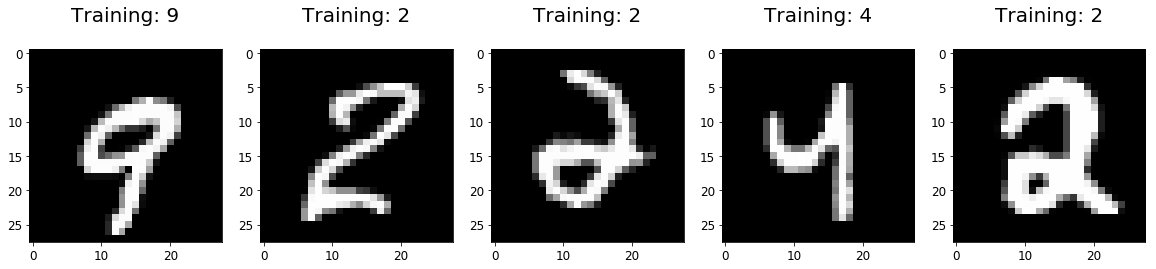

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

### Fitting a classification model to the data.

#### Step 1: Import the logistic regression classifier

In [12]:
from sklearn.linear_model import LogisticRegression

#### Step 2. Make an instance of the Model

**TODO:** Instantiate your logic regression model.

All parameters not specified are set to their defaults. The  default solver `liblinear` is relatively slow. Change the solver to `lbfgs` when you instanciate your model. Please feel free to experiment with other solvers.

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    

In [13]:
# your work here

logisticRegression = sklearn.linear_model.LogisticRegression(solver='lbfgs')

#### Step 3. Train the model on the training data 

Training is all about learning the relationships between the predictor variables and target variable.


**TODO:** Fit your model to the data.

In [14]:
logisticRegression.fit(train_img, train_lbl)

/home/gagan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gagan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/gagan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


KeyboardInterrupt: 

**observation:** can't converge. going to try to increase number of iterations

default is 100

In [15]:
logisticRegression = sklearn.linear_model.LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='auto')

In [16]:
logisticRegression.fit(train_img, train_lbl)

/home/gagan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
logReg_NewtonCGSolver = sklearn.linear_model.LogisticRegression(solver='newton-cg', max_iter=1000, multi_class='auto')

In [30]:
logReg_NewtonCGSolver.fit(train_img, train_lbl)

KeyboardInterrupt: 

In [31]:
logReg_sagaSolver = sklearn.linear_model.LogisticRegression(solver='saga', max_iter=1000, multi_class='auto')

In [ ]:
logReg_sagaSolver.fit(train_img, train_lbl)

In [17]:
logReg2 = sklearn.linear_model.LogisticRegression(solver='sag', max_iter=1000, multi_class='auto', n_jobs=-1)

In [18]:
logReg2.fit(train_img, train_lbl)

KeyboardInterrupt: 

In [22]:
logReg2 = sklearn.linear_model.LogisticRegression(solver='saga', max_iter=1000, multi_class='auto', n_jobs=-1, C=50, penalty='l1', tol=0.1)

In [23]:
logReg2.fit(train_img, train_lbl)

LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=-1, penalty='l1', random_state=None, solver='saga',
          tol=0.1, verbose=0, warm_start=False)

## wow i got it to fit

i found that the model was not converging. i consulted stackoverflow [here](https://stackoverflow.com/a/55859747) and saw someone suggest really slimming down the critera to converge.

#### Obtain Step 4. 

**TODO:** Predict labels on hold out data. As a sanity test, first predict labels on the first ten test images.


In [25]:
logisticRegression = logReg2

In [26]:
# your work here
# Note: predict returns a NumPy Array

logisticRegression.predict(test_img[:10])

array([1., 9., 2., 2., 7., 1., 8., 3., 3., 7.])

In [27]:
test_lbl[:10]

array([1., 9., 2., 2., 7., 1., 8., 3., 3., 7.])

## mini observation

wow it got all of them correct

**TODO:** Predict labels on the entire set of test images. Assign the results to `predictions.`

In [28]:
# Returns a NumPy Array
# Predict for One Observation (image)
predictions = logisticRegression.predict(test_img)

In [31]:
predictions

array([1., 9., 2., ..., 1., 9., 3.])

In [32]:
len(predictions)

21000

## mini observation
wow this dataset really fit the data fast

#### Measuring Model Performance

While there are other ways of measuring model performance (precision, recall, F1 Score, ROC Curve, etc). First, lets use accuracy as our metric. 

$Accuracy = \dfrac{correct \space predictions}{total \space predictions}$

**TODO:** Use the LogisticRegression `score()` method to retrieve and display the model accuracy.

In [30]:
# your work here

score = logisticRegression.score(test_img, test_lbl)
print(score)


0.9205238095238095


## obs on score of full thing

wow 92 percent is pretty amazing for logistic regression

#### Evaluate incorrect classifications

A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. 

Each entry  in a confusion matrix *(i, j)* is the number of observations actually in group *i* but predicted to be in group *j* (column).

Note: Wikipedia and other references may use different convention for axes:   
https://en.wikipedia.org/wiki/Confusion_matrix    

A confusion matrix can be generated using scikit-learn.   

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html 

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [34]:
cm = metrics.confusion_matrix(test_lbl, predictions)
print(cm)

[[1947    0   10    4    5   14   14    4    7    3]
 [   0 2336   14    9    1    8    1    4   31    8]
 [  10   23 1850   28   24   10   24   25   41   10]
 [   4   10   50 1854    0   64    5   21   51   23]
 [   6    7   15    4 1920    1   21    6   22   76]
 [  26    5   13   73   19 1642   34   10   74   24]
 [  13    7   15    0   16   24 1989    4    7    3]
 [   8    8   24    5   23    1    2 2047    2   71]
 [  10   43   13   54   11   57   15    7 1862   21]
 [  14    8    7   29   55   12    1   63   20 1884]]


Plotting the confusion matrix can make interpreting the results more clear.

Here is the confusion matrix plotted in matplotlib. Its a bit involved.

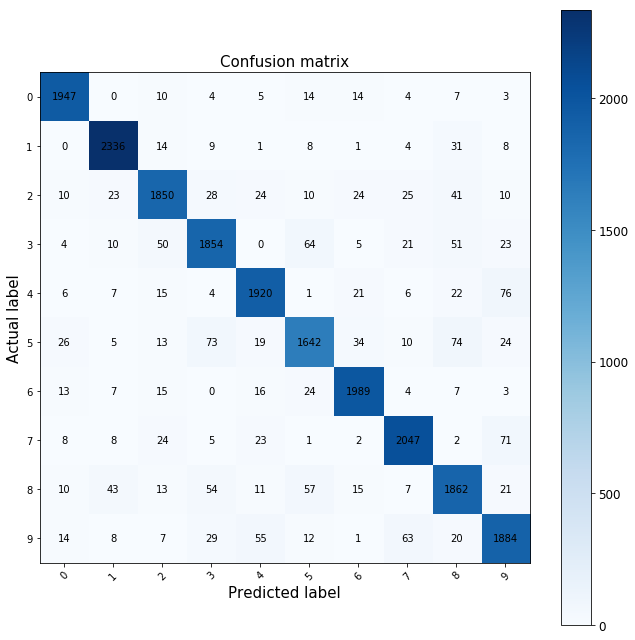

In [35]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

Plotting the confusion matrix with Seaborn is a bit easier.

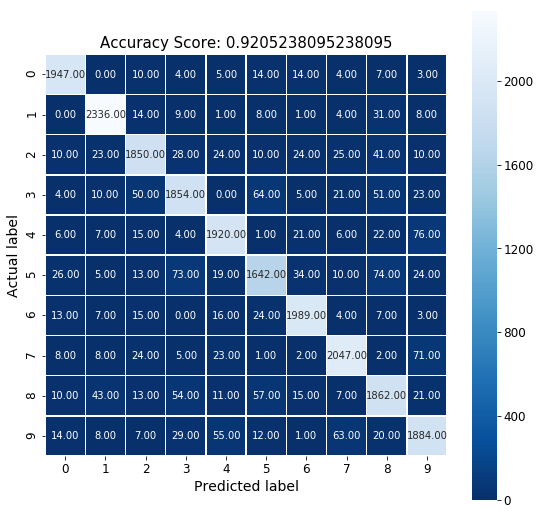

In [36]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

#### Displaying misclassified images with predicted labels  


In [37]:
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict: 
#         print(label, predict)
        misclassifiedIndexes.append(index)
    index +=1

Showing the misclassified images and image labels using matplotlib


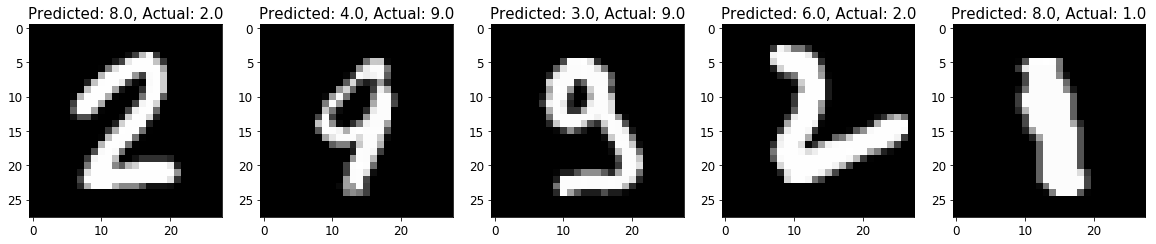

In [38]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
#     print(plotIndex, badIndex)
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

**TODO:** Qualitatively, i.e., by observation, try to identify types of missclassifications, i.e., mixing up `5` with `6`, by reviewing missclassified images (see above).
    
Observations:
    

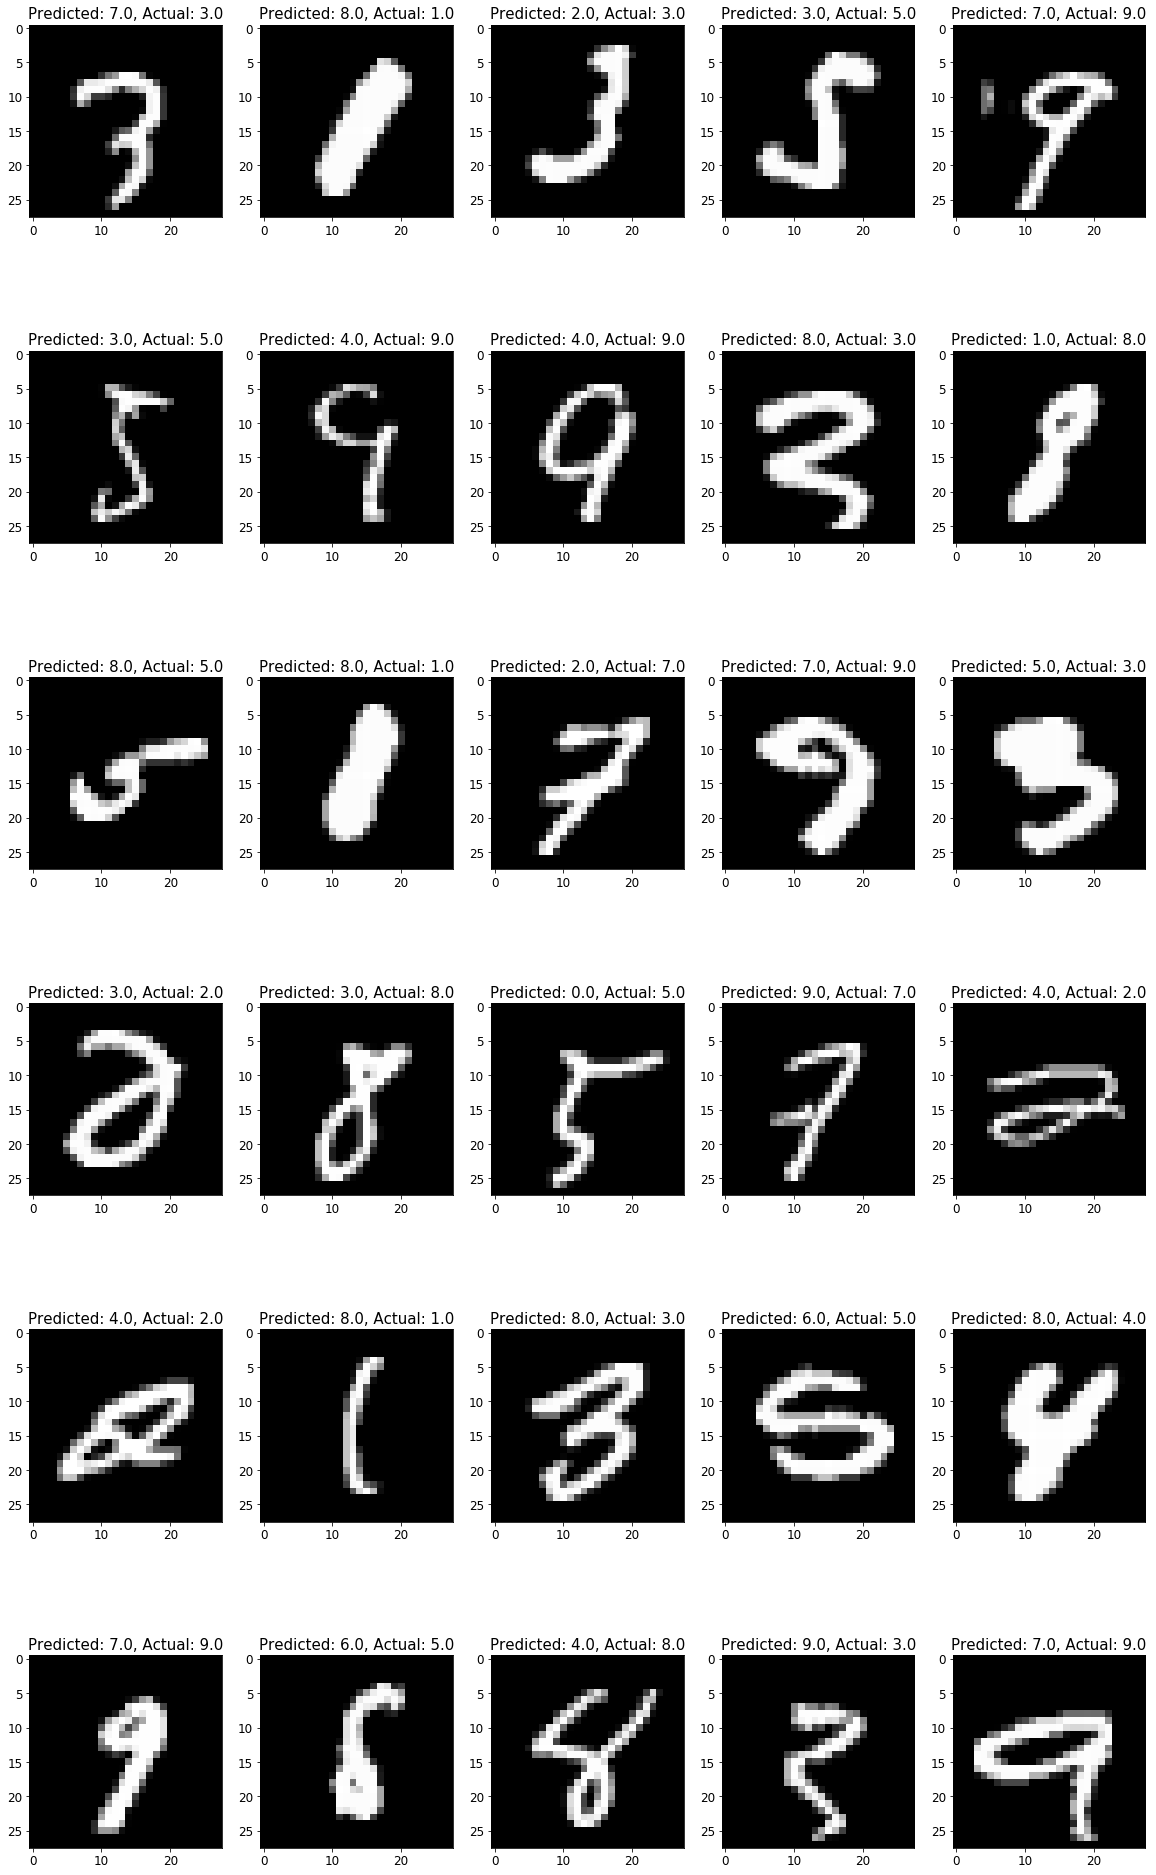

In [54]:
plt.figure(figsize=(20,35))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[5:35]):
#     print(plotIndex, badIndex)
    plt.subplot(6, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

## observed missclassifications

* the thick narrow `8`s and `1`s ogt mismatched.
* anything that kinda filled in the center got classified as a `3`
* some of the guesses I honestly agree with the classifier. the `8` and `4` mixups are really tough to guage from the images

#### Terminology

For each class label, e.g., 0, 1, ..., 9:
- true positive (TP) - correctly classified as positive example   
- true negative (TN) - correctly classified as negative example
- false positive (FP)- incorrectly classified as positive example  
- false negative (FN)- incorrectly classified as negative example  

Accuracy = TP+TN/ALL

We will discuss these measurements in more detail in class.

**TODO:** Try to quantitatively identify missclassifications and types of missclassifications using confusion matrix data (above).
    
For example, what is the accuracy of each number? For each number what numbers is it typically confused by?

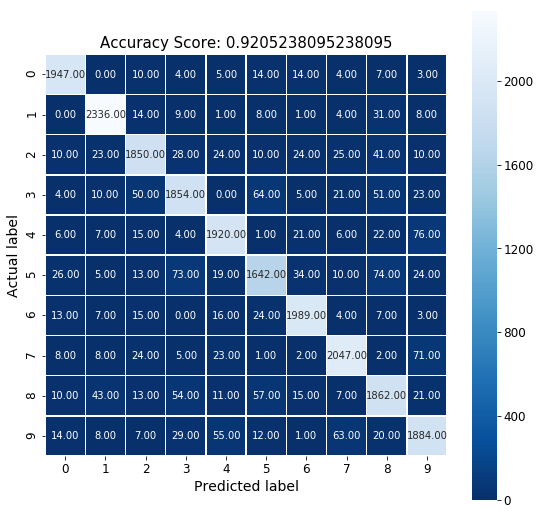

In [55]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## observed frequent misclassifications

I determined an outlier to be a cell with a value over 40.

* `0`
 *  High Accuracy score. Most frequent misclassification was as a `5`. 
 
* `1`
 * High mixup with `8`s

* `2`
 * High mixups with `3`s
 
* `6`
 * not that bad, comparable with `0` in terms of high accuracy.
 * when misclassified, usually `5`.
 
* `3 5 & 8`
 * high mixups with `8`s and `5`s, lowish high mixups with `9`. 
 * lowest classification accuracy of the bunch
 
* `4 9 & 7`
 * High misclassification rate with one another

the misclassification numbers all look pretty alike.

**BONUS:** Evaluate one or more other scikit-learn classifiers on the MNIST dataset and try to top your screo with logistic regession.
    

In [57]:
# optional work here
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn_class = KNeighborsClassifier()

In [60]:
knn_class.fit(train_img, train_lbl)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
knn_pred = knn_class.predict(test_img)

In [ ]:
knn_scores = knn_class.score(test_img, test_lbl)